In [59]:
from IPython.core.display import HTML
HTML("\n".join(open("c360_style.css", 'r').readlines()))

## Libs

In [60]:
#!pip install plotly --upgrade

In [61]:
#from libgcp import GCPConnectClass
from eda import EDAClass

In [62]:
from nlp import nlpClass
nlp = nlpClass()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dorronsoro.a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dorronsoro.a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
#from ml_scikit import mlScikitClass
#ml = mlScikitClass()

In [147]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import platform
import seaborn as sns
import plotly.express as px
import unidecode
import scipy.stats as stats

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [66]:
import emoji 
#!pip install emoji
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Data Load

In [67]:
connect = False

In [68]:
if(connect): 
    print('Configurando y accediendo a GCP!')
    gcp = GCPConnectClass()
    mail = gcp.mail
    !gcloud config set account $mail
    !gcloud config set account $mail
    gcp.get_init()
    df = gcp.get_dataset()
    df.to_csv('dataset.csv', index=False)
    dff = gcp.get_dataset_nlp()
    dff.to_csv('dataset_nlp.csv', index=False)
else: 
    print('Dataframes de copias previas del fichero!')
    df = pd.read_csv('dataset.csv')
    dff = pd.read_csv('dataset_nlp.txt')

Dataframes de copias previas del fichero!


In [69]:
eda_time = EDAClass(df, 'Tempus', 'DF para el estudio del impacto temporal en email marketing')
eda_time.render_null_cols()
values = [-1,-1,-1]
cols = eda_time.get_null_cols()
df = eda_time.fillna_eda(cols, values)
eda_time.render_null_cols()

Cargado dataframe: Tempus
Dataframe Tempus - Null columns ['avg_open_timediff', 'avg_open_hour_timediff', 'avg_click_timediff']
Dataframe Tempus - Null columns []


In [70]:
eda_sl = EDAClass(dff, 'Textus', 'DF para el estudio del impacto del Subject Line en email marketing')
eda_sl.render_null_cols()

Cargado dataframe: Textus
Dataframe Textus - Null columns []


### Tempus: DF para el estudio del impacto temporal en acciones de marketing

In [71]:
df.head()

,userId,mes,dia,hora,dia_semana,days_diff_reg,regdate,age,dominio,gender,sent_emails,open_emails,click_emails,avg_open_timediff,avg_open_hour_timediff,avg_click_timediff
0,use_dOzTACnGvadBOYytVl91h2wAnbo,12,12,0,7,5140,2006-11-16,33,hotmail,F,1,1,0,526.0,9.0,-1.0
1,use_CBrjyJVHrNZe6m8EcHJ1hE3Nnpv,12,12,0,7,172,2020-06-23,35,hotmail,F,1,0,0,-1.0,-1.0,-1.0
2,use_cg6kJp5k8CuugBSDUTm1h2u4fDi,12,12,0,7,3368,2011-09-23,45,others,F,1,1,1,59.0,1.0,1.0
3,use_HB3G50wPXW0xJZwpj2O1hDyxmQC,12,12,0,7,1188,2017-09-11,57,yahoo,F,1,1,0,529.0,9.0,-1.0
4,use_58B9hfNE9ZuTEpBoILI1hB6yFmH,12,12,0,7,173,2020-06-22,39,hotmail,F,1,1,0,535.0,8.0,-1.0


### Textus: DF para el estudio del impacto de cualquier call to action

In [72]:
dff.head()

,camp_sl,openers,senders,camp_sl_cl,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji
0,"<%${user['FirstName']}%>, ?? 5€ de descuento e...",2,2,", ?? 5€ de descuento en repsol",1,0,0,1,0,0,0,0
1,"<%${user['FirstName']}%>, gana estas Navidades...",783,11421,", gana estas navidades un joyero exclusivo",1,0,0,0,0,0,0,0
2,"<%${user['FirstName']}%>, [solo hoy] elige ent...",2084,24043,", [solo hoy] elige entre ariel pods o líquido.",1,0,0,0,0,0,0,0
3,"🙏Disculpa la incidencia, <%${user['FirstName']...",580,886,"🙏disculpa la incidencia, , 5€ de dto en repsol...",1,0,0,1,0,0,0,1
4,"<%${user['FirstName']}%>, participa y llévate...",2670,28482,", participa y llévate un pack de pantene",1,0,0,0,0,0,0,0


## Data Cleaning

### Textus

In [73]:
dff['camp_sl_cl'] = dff['camp_sl_cl'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
dff['camp_sl_cl'] = dff['camp_sl_cl'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [74]:
dff['camp_sl_cl'] = dff['camp_sl_cl'].apply(unidecode.unidecode)

In [75]:
dff['emojis'] = dff['camp_sl'].apply(nlp.text_has_emoji)

In [76]:
dff.loc[(dff['emoji'] == 0) & (dff['emojis'] == True), 'emoji'] = 1
dff[(dff['emoji'] == 0) & (dff['emojis'] == True)]

,camp_sl,openers,senders,camp_sl_cl,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji,emojis


In [77]:
del dff['emojis']

In [78]:
dff.head()

,camp_sl,openers,senders,camp_sl_cl,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji
0,"<%${user['FirstName']}%>, ?? 5€ de descuento e...",2,2,", 5 de descuento en repsol",1,0,0,1,0,0,0,0
1,"<%${user['FirstName']}%>, gana estas Navidades...",783,11421,", gana estas navidades un joyero exclusivo",1,0,0,0,0,0,0,0
2,"<%${user['FirstName']}%>, [solo hoy] elige ent...",2084,24043,", solo hoy elige entre ariel pods o liquido.",1,0,0,0,0,0,0,0
3,"🙏Disculpa la incidencia, <%${user['FirstName']...",580,886,"disculpa la incidencia, , 5 de dto en repsol l...",1,0,0,1,0,0,0,1
4,"<%${user['FirstName']}%>, participa y llévate...",2670,28482,", participa y llevate un pack de pantene",1,0,0,0,0,0,0,0


In [79]:
dff['sl_brand'] = dff['camp_sl'].str.lower().apply(nlp.applyBrand_subjectLine)
dff['sl_retailer'] = dff['camp_sl'].str.lower().apply(nlp.applyRet_subjectLine)

In [80]:
dff['camp_sl_cl'] = dff['camp_sl_cl'].str.replace('\d+', '')

In [81]:
dff['camp_sl_cl2'] = dff.apply(lambda x: nlp.process_message(x['camp_sl_cl'], True, True, False, True, 1), axis=1)
#dff['camp_sl_token'] = dff.apply(lambda x: nlp.process_message_list(x['camp_sl_cl'], True, True, False, True, 1), axis=1)

In [82]:
#dff['camp_sl_token'] = dff['camp_sl_cl'].apply(nlp.process_message_list)

In [83]:
dff['open_%'] = 100*dff['openers']/dff['senders']

In [84]:
doc_sug = pd.read_csv('doc_sug.csv')
doc_sug.head()

,keyword,suggestion
0,activo,activar
1,amigo,amig
2,apuntate,apuntar
3,ayudanos,ayudar
4,cdigo,codigo


In [85]:
dff.head()

,camp_sl,openers,senders,camp_sl_cl,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji,sl_brand,sl_retailer,camp_sl_cl2,open_%
0,"<%${user['FirstName']}%>, ?? 5€ de descuento e...",2,2,", de descuento en repsol",1,0,0,1,0,0,0,0,0,0,descontar repsol,100.000000
1,"<%${user['FirstName']}%>, gana estas Navidades...",783,11421,", gana estas navidades un joyero exclusivo",1,0,0,0,0,0,0,0,0,0,ganar navidad joyero exclusivo,6.855792
2,"<%${user['FirstName']}%>, [solo hoy] elige ent...",2084,24043,", solo hoy elige entre ariel pods o liquido.",1,0,0,0,0,0,0,0,1,0,solo hoy elegir ariel pods liquidar,8.667804
3,"🙏Disculpa la incidencia, <%${user['FirstName']...",580,886,"disculpa la incidencia, , de dto en repsol li...",1,0,0,1,0,0,0,1,0,0,disculpar incidencia dto repsol listo,65.462754
4,"<%${user['FirstName']}%>, participa y llévate...",2670,28482,", participa y llevate un pack de pantene",1,0,0,0,0,0,0,0,0,0,participar llevate pack pantene,9.374342


In [86]:
for i in range(0, doc_sug.shape[0]):
    dff['camp_sl_cl2'] = dff['camp_sl_cl2'].replace(doc_sug['keyword'].iloc[i] ,doc_sug['suggestion'].iloc[i])

In [87]:
dff['camp_sl_token'] = dff['camp_sl_cl2'].apply(nlp.convert_arry)

In [88]:
nlp.create_keywords(dff, 'camp_sl_token')

In [89]:
dff_bow = nlp.bag_of_words(dff, 'camp_sl_cl2')
dff_tfidf = nlp.tfidf(dff, 'camp_sl_cl2')

In [90]:
dff_bow.head()

,camp_sl,openers,senders,camp_sl_cl,personalized,questions,exclamation,euros,horas,promo,...,valorar,vencer,venus,ver,verano,viajar,vida,volution,yomequedoencasa,zzzquil
0,"<%${user['FirstName']}%>, ?? 5€ de descuento e...",2,2,", de descuento en repsol",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"<%${user['FirstName']}%>, gana estas Navidades...",783,11421,", gana estas navidades un joyero exclusivo",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"<%${user['FirstName']}%>, [solo hoy] elige ent...",2084,24043,", solo hoy elige entre ariel pods o liquido.",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"🙏Disculpa la incidencia, <%${user['FirstName']...",580,886,"disculpa la incidencia, , de dto en repsol li...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"<%${user['FirstName']}%>, participa y llévate...",2670,28482,", participa y llevate un pack de pantene",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
dff_tfidf.head()

,camp_sl,openers,senders,camp_sl_cl,personalized,questions,exclamation,euros,horas,promo,...,valorar,vencer,venus,ver,verano,viajar,vida,volution,yomequedoencasa,zzzquil
0,"<%${user['FirstName']}%>, ?? 5€ de descuento e...",2,2,", de descuento en repsol",1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"<%${user['FirstName']}%>, gana estas Navidades...",783,11421,", gana estas navidades un joyero exclusivo",1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"<%${user['FirstName']}%>, [solo hoy] elige ent...",2084,24043,", solo hoy elige entre ariel pods o liquido.",1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"🙏Disculpa la incidencia, <%${user['FirstName']...",580,886,"disculpa la incidencia, , de dto en repsol li...",1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"<%${user['FirstName']}%>, participa y llévate...",2670,28482,", participa y llevate un pack de pantene",1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
dff_bow.to_csv('dataset_bow.csv', index=False)
dff_tfidf.to_csv('dataset_tfidf.csv', index=False)

## EDA

### Tempus

In [93]:
time_rel = df[df['avg_open_hour_timediff']!= -1]
time_rel = time_rel.groupby([ 'avg_open_hour_timediff']).agg({'userId':'count'})
time_rel = time_rel.reset_index()
time_rel['cum_sum'] = time_rel['userId'].cumsum()
time_rel['cum_perc'] = 100*time_rel['cum_sum']/time_rel['userId'].sum()

In [94]:
time_rel.head()

,avg_open_hour_timediff,userId,cum_sum,cum_perc
0,0.0,26634,26634,16.561270
1,1.0,23144,49778,30.952425
2,2.0,13453,63231,39.317626
3,3.0,9685,72916,45.339850
4,4.0,7211,80127,49.823717


In [95]:
import plotly.express as px
fig = px.line(time_rel, x="avg_open_hour_timediff", y=["cum_perc"])
fig.show()

<div class="images">
  <span class="closebtn" onclick="">×</span>
  <strong>Hora del día</strong> En las primeras 4 horas se obtiene el 50% de las aperturas
</div>

In [96]:
daytime = df.groupby([ 'hora', 'open_emails']).agg({'userId':'count'})
daytime = daytime.reset_index()
res = daytime.pivot(index='hora', columns='open_emails', values='userId')
res = res.reset_index()
res.columns = ['hora', 'non_open', 'open']
res['open'] = res['open'].fillna(0)
res['open_%'] = 100* res['open']/(res['open'] + res['non_open'])
res['send'] = res['open'] + res['non_open']
res['send_%'] = 100*res['send']/sum(res['send'])
res.head()

,hora,non_open,open,open_%,send,send_%
0,0,1954.0,1161.0,37.271268,3115.0,0.261385
1,1,1493.0,828.0,35.674278,2321.0,0.194759
2,2,1308.0,726.0,35.693215,2034.0,0.170676
3,3,324.0,154.0,32.217573,478.0,0.040110
4,4,3.0,2.0,40.000000,5.0,0.000420


In [97]:
import plotly.express as px
fig = px.line(res, x="hora", y=["send_%", "open_%"])
fig.show()

<div class="images">
  <span class="closebtn" onclick="">×</span>
  <strong>Hora del día</strong> El 75% de los correos se envía de 9 a 14 horas
</div>

In [98]:
dayweek = df.groupby([ 'dia_semana', 'open_emails']).agg({'userId':'count'})
dayweek = dayweek.reset_index()
res = dayweek.pivot(index='dia_semana', columns='open_emails', values='userId')
res = res.reset_index()
res.columns = ['dia_semana', 'non_open', 'open']
res['open'] = res['open'].fillna(0)
res['open_%'] = 100* res['open']/(res['open'] + res['non_open'])
res['send'] = res['open'] + res['non_open']
res['send_%'] = 100*res['send']/sum(res['send'])
res

,dia_semana,non_open,open,open_%,send,send_%
0,1,175765,23147,11.636804,198912,16.691029
1,2,137797,20319,12.850692,158116,13.267770
2,3,112102,23251,17.178046,135353,11.357690
3,4,117580,18472,13.577162,136052,11.416344
4,5,129312,20426,13.641160,149738,12.564759
5,6,168473,25032,12.936100,193505,16.237319
6,7,189880,30174,13.712089,220054,18.465089


In [99]:
import plotly.express as px
fig = px.line(res, x="dia_semana", y=["send_%", "open_%"])
fig.show()

In [100]:
df['dia_semana'] = df['dia_semana'].astype(str)
df['hora'] = df['hora'].astype(str)
df['dia_hora'] = df['dia_semana'] + '_' + df['hora']
df.head()

,userId,mes,dia,hora,dia_semana,days_diff_reg,regdate,age,dominio,gender,sent_emails,open_emails,click_emails,avg_open_timediff,avg_open_hour_timediff,avg_click_timediff,dia_hora
0,use_dOzTACnGvadBOYytVl91h2wAnbo,12,12,0,7,5140,2006-11-16,33,hotmail,F,1,1,0,526.0,9.0,-1.0,7_0
1,use_CBrjyJVHrNZe6m8EcHJ1hE3Nnpv,12,12,0,7,172,2020-06-23,35,hotmail,F,1,0,0,-1.0,-1.0,-1.0,7_0
2,use_cg6kJp5k8CuugBSDUTm1h2u4fDi,12,12,0,7,3368,2011-09-23,45,others,F,1,1,1,59.0,1.0,1.0,7_0
3,use_HB3G50wPXW0xJZwpj2O1hDyxmQC,12,12,0,7,1188,2017-09-11,57,yahoo,F,1,1,0,529.0,9.0,-1.0,7_0
4,use_58B9hfNE9ZuTEpBoILI1hB6yFmH,12,12,0,7,173,2020-06-22,39,hotmail,F,1,1,0,535.0,8.0,-1.0,7_0


In [101]:
dayweek = df.groupby([ 'dia_hora', 'open_emails']).agg({'userId':'count'})
dayweek = dayweek.reset_index()
res = dayweek.pivot(index='dia_hora', columns='open_emails', values='userId')
res = res.reset_index()
res.columns = ['dia_hora', 'non_open', 'open']
res['open'] = res['open'].fillna(0)
res['open_%'] = 100* res['open']/(res['open'] + res['non_open'])
res['send'] = res['open'] + res['non_open']
res['send_%'] = 100* res['send']/res['send'].sum()
res.head()

,dia_hora,non_open,open,open_%,send,send_%
0,1_0,10.0,4.0,28.571429,14.0,0.001175
1,1_1,5.0,3.0,37.500000,8.0,0.000671
2,1_10,38410.0,3551.0,8.462620,41961.0,3.521025
3,1_11,43719.0,5283.0,10.781193,49002.0,4.111848
4,1_12,36704.0,5697.0,13.436004,42401.0,3.557946


In [102]:
res = res.sort_values(by=['send_%'], ascending= False)
res.head()

,dia_hora,non_open,open,open_%,send,send_%
135,7_11,51969.0,7103.0,12.024309,59072.0,4.956840
134,7_10,45617.0,5501.0,10.761376,51118.0,4.289405
3,1_11,43719.0,5283.0,10.781193,49002.0,4.111848
136,7_12,36302.0,6478.0,15.142590,42780.0,3.589748
4,1_12,36704.0,5697.0,13.436004,42401.0,3.557946


In [103]:
import plotly.express as px
fig = px.line(res, x="dia_hora", y=["send_%"])
fig.show()

In [104]:
import plotly.express as px
fig = px.line(res, x="dia_hora", y=["send_%", "open_%"])
fig.show()

In [105]:
res = res[res['send_%']>1]
fig = px.line(res, x="dia_hora", y=["send_%", "open_%"])
fig.show()

<div class="images">
  <span class="closebtn" onclick="">×</span>
  <strong>Hora del día</strong> El lunes a primera hora puede no ser bueno para enviar campañas de correos
</div>

In [106]:
df_v = pd.get_dummies(df, columns=['mes', 'dia', 'hora', 'dia_semana', 'gender', 'dominio'])
df_v.head()

,userId,days_diff_reg,regdate,age,sent_emails,open_emails,click_emails,avg_open_timediff,avg_open_hour_timediff,avg_click_timediff,...,dia_semana_5,dia_semana_6,dia_semana_7,gender_F,gender_M,gender_U,dominio_gmail,dominio_hotmail,dominio_others,dominio_yahoo
0,use_dOzTACnGvadBOYytVl91h2wAnbo,5140,2006-11-16,33,1,1,0,526.0,9.0,-1.0,...,0,0,1,1,0,0,0,1,0,0
1,use_CBrjyJVHrNZe6m8EcHJ1hE3Nnpv,172,2020-06-23,35,1,0,0,-1.0,-1.0,-1.0,...,0,0,1,1,0,0,0,1,0,0
2,use_cg6kJp5k8CuugBSDUTm1h2u4fDi,3368,2011-09-23,45,1,1,1,59.0,1.0,1.0,...,0,0,1,1,0,0,0,0,1,0
3,use_HB3G50wPXW0xJZwpj2O1hDyxmQC,1188,2017-09-11,57,1,1,0,529.0,9.0,-1.0,...,0,0,1,1,0,0,0,0,0,1
4,use_58B9hfNE9ZuTEpBoILI1hB6yFmH,173,2020-06-22,39,1,1,0,535.0,8.0,-1.0,...,0,0,1,1,0,0,0,1,0,0


### Textus

<AxesSubplot:ylabel='Frequency'>

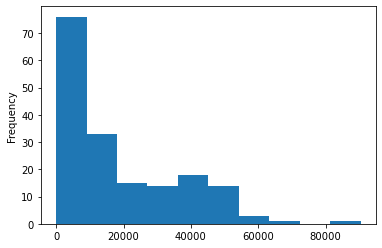

In [107]:
dff_bow['openers'].plot.hist()

In [108]:
display(np.round(dff_bow.describe()))

,openers,senders,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji,...,valorar,vencer,venus,ver,verano,viajar,vida,volution,yomequedoencasa,zzzquil
count,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,...,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0
mean,18051.0,214608.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,18247.0,216887.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1807.0,17885.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,12804.0,158830.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,31709.0,375114.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,90356.0,1376835.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [109]:
cols = ['camp_sl', 'openers', 'senders', 'open_%', 'camp_sl_cl', 'personalized',
       'questions', 'exclamation', 'euros', 'horas', 'promo', 'uppercase_word',
       'emoji', 'sl_brand', 'sl_retailer', 'camp_sl_cl2', 'camp_sl_token']
dff_bow_w= dff_bow[cols]
dff_bow_w = dff_bow_w.drop(['camp_sl', 'camp_sl_cl', 'camp_sl_cl2', 'camp_sl_token'], axis=1)
dff_bow_w.head()

,openers,senders,open_%,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji,sl_brand,sl_retailer
0,2,2,100.000000,1,0,0,1,0,0,0,0,0,0
1,783,11421,6.855792,1,0,0,0,0,0,0,0,0,0
2,2084,24043,8.667804,1,0,0,0,0,0,0,0,1,0
3,580,886,65.462754,1,0,0,1,0,0,0,1,0,0
4,2670,28482,9.374342,1,0,0,0,0,0,0,0,0,0


In [110]:
colsa= dff_bow_w.columns[3:]
for i in range(0, len(colsa)):
    print('% of '+ colsa[i] + ' emails: ' + str(100* dff_bow[colsa[i]].sum()/dff_bow.shape[0]))

% of personalized emails: 97.71428571428571
% of questions emails: 12.0
% of exclamation emails: 43.42857142857143
% of euros emails: 8.0
% of horas emails: 4.0
% of promo emails: 0.5714285714285714
% of uppercase_word emails: 15.428571428571429
% of emoji emails: 13.714285714285714
% of sl_brand emails: 53.142857142857146
% of sl_retailer emails: 2.857142857142857


In [111]:
def render_graphs(base, lista, dfa):
    for i in range(0, len(lista)):
        df = dfa[[base, lista[i]]]
        plt.scatter(df[base], df[lista[i]], alpha=0.3)
        plt.xlabel(base)
        plt.ylabel(lista[i])
        plt.show()

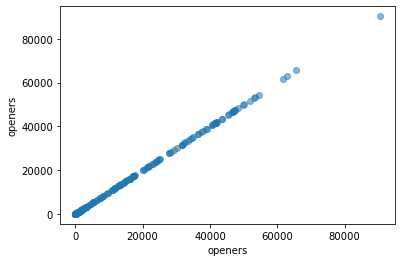

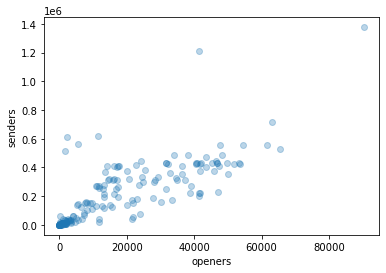

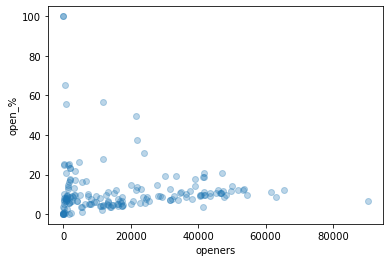

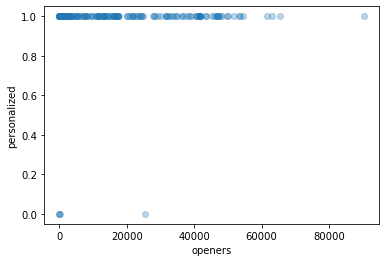

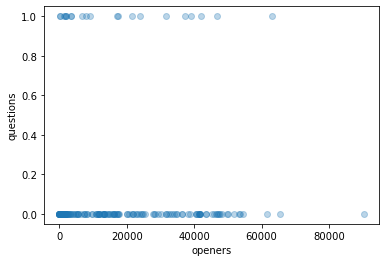

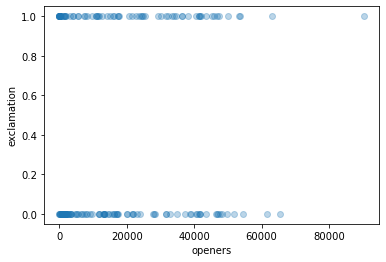

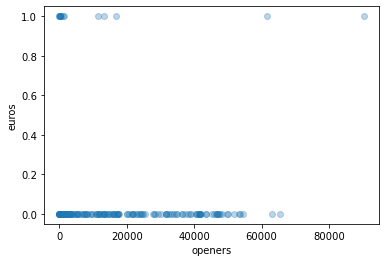

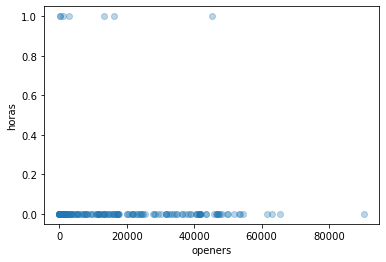

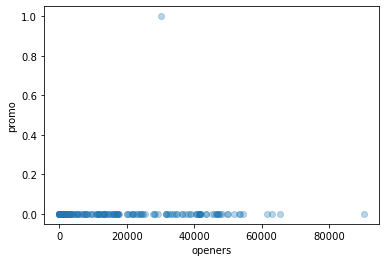

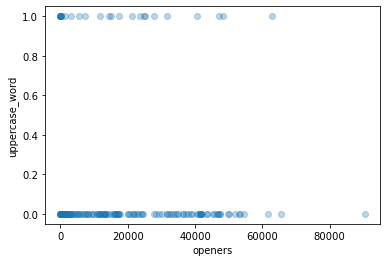

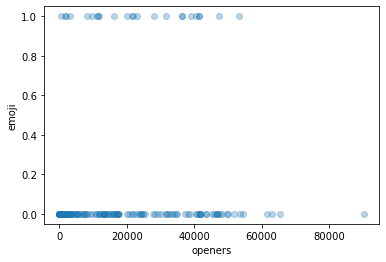

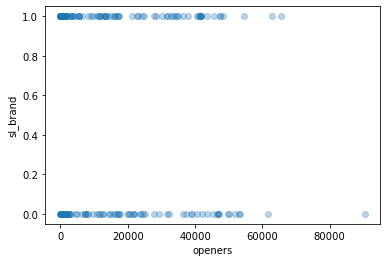

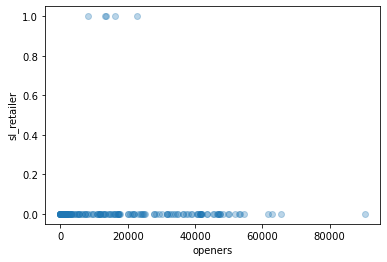

In [112]:
render_graphs('openers', dff_bow_w.columns, dff_bow_w)

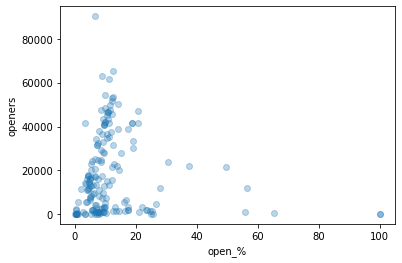

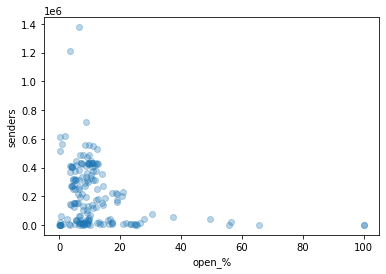

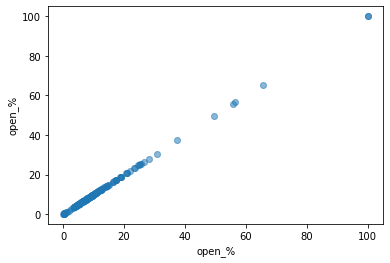

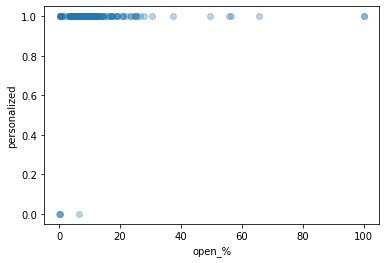

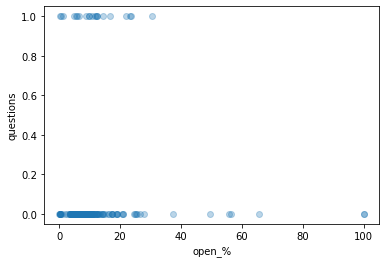

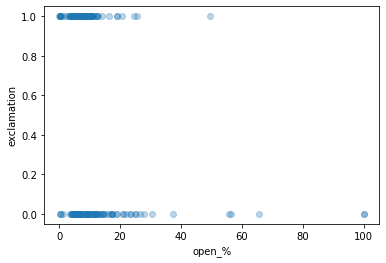

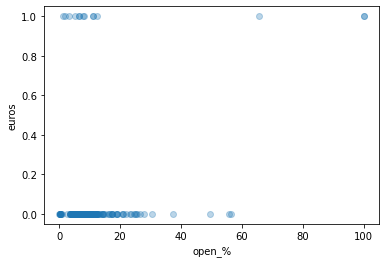

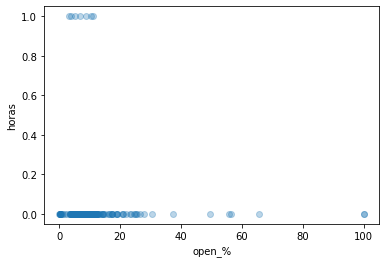

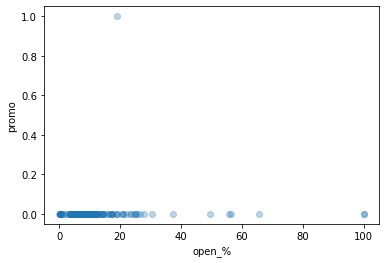

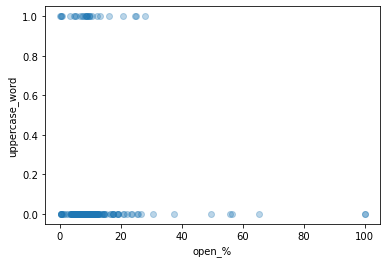

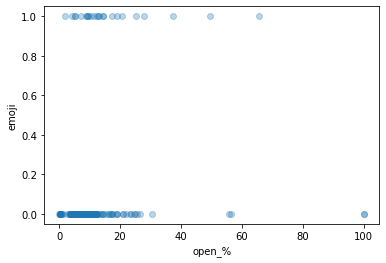

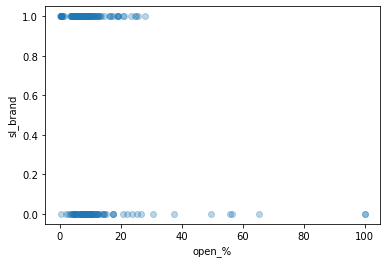

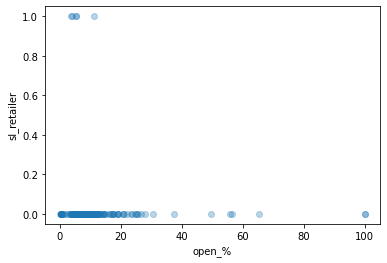

In [113]:
render_graphs('open_%', dff_bow_w.columns, dff_bow_w)

In [114]:
import seaborn as sns
corrmat = dff_bow_w.corr()
corrmat['index'] = corrmat.index
corrmat.reset_index(drop=True, inplace=True)
col_name="index"
first_col = corrmat.pop(col_name)
corrmat.insert(0, col_name, first_col)
corrmat.head()

,index,openers,senders,open_%,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji,sl_brand,sl_retailer
0,openers,1.000000,0.782951,-0.050154,0.098551,-0.001944,0.093007,-0.064605,-0.076008,0.050910,-0.049069,0.113633,-0.044369,-0.030911
1,senders,0.782951,1.000000,-0.250861,0.079951,-0.019139,0.165271,-0.003568,-0.065685,-0.019552,-0.083827,0.021461,0.005930,0.062588
2,open_%,-0.050154,-0.250861,1.000000,0.114185,-0.005489,-0.217751,0.275964,-0.071540,0.041022,-0.065738,0.160186,-0.205809,-0.075633
3,personalized,0.098551,0.079951,0.114185,1.000000,0.056478,-0.174559,0.045101,0.031220,0.011595,-0.252229,0.060975,-0.066991,0.026230
4,questions,-0.001944,-0.019139,-0.005489,0.056478,1.000000,-0.217118,0.020742,-0.075378,-0.027995,-0.060364,-0.096102,-0.005638,-0.063330


In [115]:
corr = corrmat[['index', 'openers', 'open_%']]
corr.head()

,index,openers,open_%
0,openers,1.000000,-0.050154
1,senders,0.782951,-0.250861
2,open_%,-0.050154,1.000000
3,personalized,0.098551,0.114185
4,questions,-0.001944,-0.005489


In [116]:
fig = px.line(corr, x="index", y=["openers", "open_%"])
fig.show()

###### Basic Prework includes dummies

In [117]:
dff_bow_d= dff_bow.drop(cols, axis=1)
ins= dff_bow[['openers', 'senders', 'open_%']]
dff_bow_d = pd.concat([ins,dff_bow_d], axis=1)
dff_bow_d.head()

,openers,senders,open_%,acabar,acercate,acordar,activar,activo,acto,aeg,...,valorar,vencer,venus,ver,verano,viajar,vida,volution,yomequedoencasa,zzzquil
0,2,2,100.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,783,11421,6.855792,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2084,24043,8.667804,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,580,886,65.462754,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2670,28482,9.374342,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
dff_bow_d.repsol.unique()

array([1, 0], dtype=int64)

In [119]:
cols= dff_bow_d.columns[3:]
ratios = []
valor = []
for i in range(0, len(cols)):
    valor.append(cols[i])
    ratios.append(100* dff_bow_d[cols[i]].sum()/dff_bow_d.shape[0])
df_ratios = pd.DataFrame(list(zip(valor, ratios)))
df_ratios.columns= ['term','%_ratio']
df_ratios = df_ratios.sort_values(by='%_ratio', ascending=False)
df_ratios = df_ratios.head(50)

In [120]:
fig = px.line(df_ratios, x="term", y=["%_ratio"])
fig.show()

In [121]:
import seaborn as sns
corrmat = dff_bow_d.corr()
corrmat['index'] = corrmat.index
corrmat.reset_index(drop=True, inplace=True)
col_name="index"
first_col = corrmat.pop(col_name)
corrmat.insert(0, col_name, first_col)
corrmat.head()

,index,openers,senders,open_%,acabar,acercate,acordar,activar,activo,acto,...,valorar,vencer,venus,ver,verano,viajar,vida,volution,yomequedoencasa,zzzquil
0,openers,1.000000,0.782951,-0.050154,0.086926,-0.070888,-0.061446,0.056876,0.119029,-0.013368,...,-0.113749,0.119896,0.094455,-0.075075,0.105387,-0.051362,-0.065721,0.070660,0.146408,-0.034597
1,senders,0.782951,1.000000,-0.250861,0.002703,-0.069970,-0.063320,0.076186,0.079972,0.037411,...,-0.029915,0.075834,0.104114,-0.068763,0.067719,0.031357,0.140133,0.034250,0.076289,-0.020607
2,open_%,-0.050154,-0.250861,1.000000,0.032234,-0.027601,-0.011735,-0.025225,-0.007191,-0.040602,...,0.210960,-0.005287,-0.040202,-0.065703,-0.022362,0.257949,-0.064618,-0.003345,0.002850,-0.031350
3,acabar,0.086926,0.002703,0.032234,1.000000,-0.005747,-0.005747,-0.005747,-0.005747,-0.005747,...,-0.011595,-0.005747,-0.010012,-0.005747,-0.010012,-0.010012,-0.005747,-0.005747,-0.005747,-0.005747
4,acercate,-0.070888,-0.069970,-0.027601,-0.005747,1.000000,-0.005747,-0.005747,-0.005747,-0.005747,...,-0.011595,-0.005747,-0.010012,-0.005747,-0.010012,-0.010012,-0.005747,-0.005747,-0.005747,-0.005747


In [122]:
corr = corrmat[['index', 'openers', 'open_%']]
corr = corr.sort_values(by='open_%', ascending=False)
corr.head(15)

,index,openers,open_%
2,open_%,-0.050154,1.000000
275,repsol,-0.113370,0.378795
125,familia,-0.072665,0.313689
97,disculpar,-0.072796,0.303350
104,dto,-0.072796,0.303350
155,incidencia,-0.072796,0.303350
178,listo,-0.072796,0.303350
331,viajar,-0.051362,0.257949
223,oportunidad,-0.026493,0.253109
77,dale,-0.026493,0.253109


In [123]:
corr.tail()

,index,openers,open_%
242,platinum,-0.056863,-0.100888
63,conseguir,-0.089007,-0.113819
255,probador,-0.151718,-0.131519
124,fairy,-0.057768,-0.170635
1,senders,0.782951,-0.250861


In [124]:
corr_top = corr.head(20)
corr_bot = corr.tail(20)

In [125]:
fig = px.line(corr_top, x="index", y=["openers", "open_%"])
fig.show()
fig = px.line(corr_bot, x="index", y=["openers", "open_%"])
fig.show()

In [126]:
dff_bow.to_csv('pre_modelling.csv', index=False)

## Data PreProcessing

###  Textus

In [127]:
from ml_scikit import mlScikitClass
ml = mlScikitClass()

In [128]:
dff_bow = pd.read_csv('pre_modelling.csv')
X = dff_bow.drop(['camp_sl', 'camp_sl_cl', 'camp_sl_cl2', 'camp_sl_token', 'openers', 'open_%'], axis=1)
y= dff_bow['openers']
X.head()

,senders,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji,sl_brand,...,valorar,vencer,venus,ver,verano,viajar,vida,volution,yomequedoencasa,zzzquil
0,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11421,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24043,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,886,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28482,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Outliers

Uno de los métodos más clásicos de detección de outliers es el método de tukey. Éste consiste en identificar los outliers como aquellos puntos que se salgan de la "normalidad" de los datos.

En este caso definimos un outlier como cualquier punto que sea inferior a $Q_1 - 1.5 \times IQR$ o superior a $Q_3 + 1.5 \times IQR$.

* donde $IQR$ es el rango intercuartílico $Q_3 - Q_1$
* y $Q_n$ es el cuartil $n$ de los datos.

In [129]:
indices_outliers = []
for i in range(0, len(X.columns)):
    indices_outliers.append(ml.filtrar_outlier_tukey(X[X.columns[i]]))

[q1=17885.000000, q3=375113.500000, iqr=357228.500000]
[floor=-517957.750000, ceiling=910956.250000]
[q1=1.000000, q3=1.000000, iqr=0.000000]
[floor=1.000000, ceiling=1.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=1.000000, iqr=1.000000]
[floor=-1.500000, ceiling=2.500000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=1.000000, iqr=1.000000]
[floor=-1.500000, ceiling=2.500000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, cei

[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000

[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000

In [130]:
flat_list = [item for sublist in indices_outliers for item in sublist]
flat_list = set(flat_list)
flat_list = list(flat_list)
flat_list = pd.DataFrame(flat_list) 
flat_list.columns = ['index']
flat_list.shape

(175, 1)

<div class="images">
  <span class="closebtn" onclick="">×</span>
  <strong>Outliers & Dummies:</strong> Es normal que pille el dataset. Es un filtrado por valor que tienen en cuenta indices interquartilicos. Aplicar el filtrado a columnas que tenga sentido. 
</div>

In [131]:
outlier_indices, outlier_values = ml.filtrar_outlier_tukey(X.senders)
X_f = X.drop(X.index[outlier_indices]).reset_index(drop = True)
y_f = y.drop(X.index[outlier_indices]).reset_index(drop = True)
X_f.shape

[q1=17885.000000, q3=375113.500000, iqr=357228.500000]
[floor=-517957.750000, ceiling=910956.250000]


(174, 344)

####  Scalers

###### StandardScaler

* (➕) Eficiente de calcular, requiere sólo de calcular la media y desviación de típica.
* (➕) No modifica la forma de los datos 
* (➖) Es sensible a outliers. 

######  MinMaxScaler

* (➕) Eficiente de calcular, requiere sólo del máximo y del mínimo.
* (➕) No modifica la forma de los datos 
* (➖) Es muy sensible a outliers (basta con que haya 1 outlier para sesgar el resultado).

######  RobustScaler

* (➖) No muy eficiente de calcular (requiere meter todos los datos en memoria y ordenarlos).
* (➕) No modifica la forma de los datos 
* (➕) Es robusto frente a outliers.

######  Normalizer

* (➕) Eficiente de calcular, no requiere datos en memoria.
* (❓) Modifica la forma de los datos. 
* (➖) No es robusto frente a outliers.

In [132]:
X.head()

,senders,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji,sl_brand,...,valorar,vencer,venus,ver,verano,viajar,vida,volution,yomequedoencasa,zzzquil
0,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11421,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24043,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,886,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28482,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
scaled_X=[]
techniques= ['Standard', 'MinMax', 'Robust', 'Normalizer']
for i in range(0, len(techniques)):
    scaled_X.append(ml.normalize(X, techniques[i]))  

Datos transformados usando la técnia: Standard
Datos transformados usando la técnia: MinMax
Datos transformados usando la técnia: Robust
Datos transformados usando la técnia: Normalizer


Teniendo en cuenta que tenemos pocas filas para procesar hacemos uso del que computacionalmente es más complejo pero más robusto sobre outliers

In [134]:
final_df = scaled_X[2]

In [135]:
final_df.head()

,senders,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji,sl_brand,...,valorar,vencer,venus,ver,verano,viajar,vida,volution,yomequedoencasa,zzzquil
0,-0.444612,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.412646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.377313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.442137,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.364887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Tempus

#### Scaler

In [136]:
min_max_scaler = MinMaxScaler()
for cname in ('days_diff_reg', 'age', 'avg_open_hour_timediff', 'avg_click_timediff'):
    x = df_v[cname].values.reshape(-1, 1) 
    df_v[cname] = min_max_scaler.fit_transform(x)

In [137]:
X = df_v[df_v.columns.difference(['userId', 'regdate', 'click_emails', 'avg_open_timediff', 'avg_click_timediff', 'open_emails'])]
y = df_v['open_emails']

In [138]:
X_out = X[['age', 'avg_open_hour_timediff', 'days_diff_reg']]
X_out_f = X.drop(X_out.index[outlier_indices]).reset_index(drop = True)
y_out_f = y.drop(X_out.index[outlier_indices]).reset_index(drop = True)

In [139]:
X.head()

,age,avg_open_hour_timediff,days_diff_reg,dia_1,dia_10,dia_11,dia_12,dia_13,dia_14,dia_15,...,hora_3,hora_4,hora_5,hora_6,hora_7,hora_8,hora_9,mes_11,mes_12,sent_emails
0,0.231293,0.009149,0.522651,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0.244898,0.000000,0.019155,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0.312925,0.001830,0.343063,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.394558,0.009149,0.122124,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0.272109,0.008234,0.019256,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## ML Engineering - feature selection framework

Durante este ejercicio se van a usar Textus y Tempus de forma indistinta. 

El framework hace uso de tres técnicas diferentes:

1. Hipótesis nula a través de: One sample proportion test, T test, Chi Square test, Anova test
2. Tecnicas de ML no supervisado como PCA, t-SNE, K-means, Aglomerative, DBScan
3. Técnicas de ML supervisado hacienod uso de feature importance

###  Hipotesis nula

#### One Proportion Z-test

Test estadísitico para comprobar si hay una diferencia singificativa sobre algo teórico

* H0 ( p = p0  ) No hay diferencia en proporción de la poblacíon a lo que se ha definido como hipótesis
* H1 ( p != p0  ) Lo que se ha definido como hipótesis dista de lo que se había definido

Traducido = Con 100 observaciones puedo comprobar si en una pobalción hay un 50% de mujeres? Recuerda que en mi muestra hay 35?

In [140]:
from statsmodels.stats.proportion import proportions_ztest

z_test, p_value = proportions_ztest(count=35, nobs=100, value=0.50)

In [141]:
if p_value < 0.005:
    print('Rechazo la hipotesis nula y acepto H1')
    print(p_value)
    print('Tenemos suficiente evidencia para decir que la proporcion es diferente')
else:
    print('Acepto la hipotesis nula')
    print(p_value)

Rechazo la hipotesis nula y acepto H1
0.001661694457983504
Tenemos suficiente evidencia para decir que la proporcion es diferente


<div class="images">
  <span class="closebtn" onclick="">×</span>
  <strong>Tests:</strong> Data visualization puede ser más práctico pero nunca se sabe que tipo de dataset podemos llegar a tener. 
    <br>
    Estaría interesante comprobar esta hipotesis nula en los split que hacemos con el metodo de scikit learn
</div>

#### Chi Squared test
Test estadístico para comprobar si hay una diferencia significativa entre dos variables categoricas (nominales)

In [142]:
dff_bow_w.head()

,openers,senders,open_%,personalized,questions,exclamation,euros,horas,promo,uppercase_word,emoji,sl_brand,sl_retailer
0,2,2,100.000000,1,0,0,1,0,0,0,0,0,0
1,783,11421,6.855792,1,0,0,0,0,0,0,0,0,0
2,2084,24043,8.667804,1,0,0,0,0,0,0,0,1,0
3,580,886,65.462754,1,0,0,1,0,0,0,1,0,0
4,2670,28482,9.374342,1,0,0,0,0,0,0,0,0,0


In [144]:
ct = pd.crosstab(dff_bow_w['promo'], dff_bow_w['sl_brand'], margins=True)
ct = ct.drop("All", axis=0)
obs = np.array(ct.values)

In [151]:
p_value = stats.chi2_contingency(obs)[0:3][1]

In [150]:
if p_value < 0.005:
    print('Rechazo la hipotesis nula y acepto H1')
    print(p_value)
    print('Tenemos suficiente evidencia para decir que la proporcion es diferente')
else:
    print('Acepto la hipotesis nula y rechazo H0')
    print('Es decir, esta variable no es signficativa para predecir si un campaña va a ser branded')
    print(p_value)

Rechazo la hipotesis nula y acepto H1
0.001661694457983504
Tenemos suficiente evidencia para decir que la proporcion es diferente


#### Anova test
Test estadístico para comprobar si hay una diferencia significativa entre una variable continua y otra categorica

In [153]:
stats.f_oneway(dff_bow_w['openers'][dff_bow_w['euros'] == 0],
               dff_bow_w['openers'][dff_bow_w['euros'] == 1])

F_onewayResult(statistic=0.7250921854918899, pvalue=0.39565579926507755)

In [157]:
print('Como p value es > 0.05 podemos aceptar H0: Hay diferencia entre las medias, y rechazamos H1')
print('Esta variable por lo tanto podría ser practica')

Como p value es > 0.05 podemos aceptar H0: Hay diferencia entre las medias, y rechazamos H1
Esta variable por lo tanto podría ser practica


#### A considerar
Cada uno de estos tests tiene caractaréisticas importantes que el dataset tiene que cumplir. 

Por ejemplo, para poder aplicar el test de anova y sacar conclusiones evidentes los datos tienen que tener una distribución normal.

Estos detalles no se han comprendido en este análisis por falta de tiempo. 

Enlace interesante con implementación en Python: https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

###  Reducción de dimensionalidad

#### PCA

In [164]:
X.head()

,age,avg_open_hour_timediff,days_diff_reg,dia_1,dia_10,dia_11,dia_12,dia_13,dia_14,dia_15,...,hora_3,hora_4,hora_5,hora_6,hora_7,hora_8,hora_9,mes_11,mes_12,sent_emails
0,0.231293,0.009149,0.522651,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0.244898,0.000000,0.019155,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0.312925,0.001830,0.343063,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.394558,0.009149,0.122124,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0.272109,0.008234,0.019256,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [160]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [161]:
pca.fit(X)
dataset_X_pca = pca.transform(X)
pca.components_.T.shape

(74, 2)

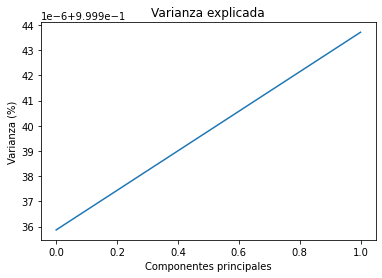

In [162]:
from pca_asier import pcaAsierClass
pca_lib = pcaAsierClass()
pca_lib.explained_variance(pca)

In [165]:
pca_df = pd.DataFrame.from_records(pca.components_.T)
cols = []
for i in range(0, len(pca_df.columns)):
    cols.append('Component_'+str(i))
pca_df.columns = cols
pca_df['Component_0'] = pca_df['Component_0'] *100
pca_df['Component_1'] = pca_df['Component_1'] *100
pca_df['Atributo'] = pca_df.index
pca_df_c0 = pca_df.sort_values(by=['Component_0'], ascending=False)
pca_df_c1 = pca_df.sort_values(by=['Component_1'], ascending=False)

In [166]:
fig = px.scatter(pca_df_c0, x="Atributo", y=["Component_0", "Component_1"])
fig.show()

<div class="images">
  <span class="closebtn" onclick="">×</span>
  <strong>PCA:</strong> He creado la clase pcaAsierClass que expone los conceptos más importantes. 
    <br>
    Dispone de metodos prácticos para: Plotear la varianza de los componentes o los Loading Scores de cada componente
</div>

In [167]:
pca_lib.relevant()

- Los datos tienen que estar escalados. A través de las pendientes se generan los loading scores... 
- El algoritmo de PCA con el que se calculan los compnentes se llama SVD.
- SVD cacula el teorema de pitagoras en base del origen de los ejes. Así, los datos tienen que estar centrados.
- Hay dos formas de crear PCAs. A través del número de componentes o a través del % de varianza que queremos considerar
- Aunque la varianza acumulada sea bajita, siempre hay que visualizar los datos. Aun se pueden generar clusters.
- En principio se dice que PCA reduce overfitting porque pieredes información al crear PCAs. No obstante, hay otras variables que tienen impacto en el overfitting como el split en train test ;) 
- PCA es muy rapido de calcular pero parte de forma lineales al calcular lo cual puede hacer que no sea super práctico siempre! Para eso está t-SNE, MDS, NMF


In [169]:
pca_lib.dict_definition('eigenvalue')

- PCA genera dimesniones adicionales. Estas son caluladas siguiendo el teorema de pitagoras.
- Eigenvalue represnta el tamaño de la hipotenusa en escala de 1
- Eigenvalue no da información interpretable
- Los loading socres son interpretables y calculados a través del Eigenvalue
- Referencia: https://www.youtube.com/watch?v=FgakZw6K1QQ&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=24
- Tiempo: 12:14


#### t-SNE

PCA es un ejercicio potente y rápido. No obstante, tiene limitaciones debido a que su rapidez es consecuencia de la interpretación de relaciones lineales en sus ejercicios. 

Existen otros algoritmos capaces de realizar tareas similares a PCA pero de una forma no lineal, un ejemplo de ellos es `TSNE` (*t-distributed Stochastic Neighbor Embedding*). 

No obstante, parece que no se puede hacer uso de esta técnica para ver las contribuciones de las variables. Podría hacerse uso de esto como parte de un ejercicio de feature egineering haciendo uso de estas dimensiones como variables adiciones (o no adicionales).

#### Clustering: K-Means / Agglomerative / Dbscan

El ejercicio consiste en la creación de clusters para comprender si hay clusters de los que podemos sacar conclusiones o patrones entre variables. 

Cada uno de los tres tipos de algoritmos ha sido estudiado en profundidad. 

He creado una clase que incluye las diferencias entre cada uno de ellos metodos de utilidad. 

In [171]:
from clusters import clustersClass
clusters_asier = clustersClass()

In [173]:
clusters_asier.dict_definition('kmeans')

- Kmeans puede dar resultados diferentes. Por lo tanto, se define un parametro "n_init" que comprende varias ejecuciones del modelo.
- El mejor resultado es aquel que da un menor valor para la varianza. Estaría bien comprobar en su totalidad y por centroide.
- Se habla de varianza porque en Kmeans se generan centroides y se calcula la variabilidad como la distancia de cada punto hasta el centroide. 
- A diferencia del DBSCAN o Agglomerative (Hierarch) se indican los clusters de antemano siempre
- Siempre se calcula la distancia euclidea. Considera que la distnacia euclidea, si un dataset tiene 1000 columnas sería la raiz del cuadrado de cada uno de esos mil componentes
- El algoritmo de iniciación es clave
- Es muy sensible a outliers porque clasifica todo
- Comptuacionalmente lleva tiempo porque calcula todas las distancias por iteración de cada ejecución
- Cada punto calculado es en bas
- Refernecia: https://www.youtube.com/watch?v=4b5d3muPQmA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&

In [174]:
clusters_asier.dict_definition('agglomerative')

- Dentro del hierarchical clustering, hay agglomerative (Bottom up) y divisive (top down). Ambos dan resultados parecidos pero el agglomerative es matemáticamente más sencillo. 
- Es mas preciso que Kmeans pero computacionalmente mas costoso
- Capaz de econtrar clusters con formas geometricas aribtrarias
- El dendograma representa como se crean los clusters
- Tres ejes principales a considerar: 
- 1) Como representar el cluster: centroide (euclidea) o clustroide (no euclidea)
- 1.1) Esto sería el parametro affinity
- 2) Determinar la cercanía entre clusters: Distancia entre centroides o clustroides - Tipos de distnacias: Euclidea / No euclidea - Manhattan
- 2.1) Esto sería el parametro linkage
- 3) Cuando parar: 
- 3.1) Podemos definir los clusters de antemano o hacerlo dependiente de una función - Min 12:10
- Refernecia: https://www.youtube.com/watch?v=rg2cjfMsCk4


In [172]:
clusters_asier.dict_definition('dbscan')

- Muy robusto frente a outliers
- Capaz de econtrar clusters con formas geometricas aribtrarias
- Dipone de dos parametros: Epsilon y minimum points
- Hay tres tipos de puntos: Core, border y outlier - Min: 2:15
- Asume densidades similares en todos los clusters y eso puede ser un problema
- Valores noisy tienen el label de -1. Es decir, los outliers
- Refernecia: https://www.youtube.com/watch?v=sJQHz97sCZ0


<div class="images">
  <span class="closebtn" onclick="">×</span>
  <strong>Clusters:</strong> Se puede hacer uso del agglomerative para interpretar la ontología o en función de la complejidad que se busca en la agrupación. IE, formas geométricas (aplica también para DBSCAN)
    <br>
    Se podría usar DBSCAN para realizar ejercicios de detección de anomalías - valor -1. 
    <br>
    El outcome de los algoritmos de clustering se puede usar como parte de un ejercicio de feature engineering. Una nueva columna.
</div>

<div class="images">
  <span class="closebtn" onclick="">×</span>
  <strong>Recomendación:</strong> Se recomienda hacer una pivot table con % de open rates por hora y día por consumidor. Esos clusters nos permitira agrupar usuarios en base a difernetes columnas. De ahí se puede sacar el relevant time. 
    <br>
    </div>

###  Feature importance

Esta fase no ha podido completarse. No obstante, expongo el planteamiento en mente. Con el fin de seguir abordando otro área interesantísimo, pretendía hacer uso de herramientas como Opuna o H2O que permite reducir los tiempos de hiperparametrización. 

Estos serían los pasos:
1. Selección el mejor modelo de regresión para cada uno de los datasets (Textus y Tempus). En un caso podría ser un RF mientras en otro un XGBoost. 
2. Hacer uso de herramientas como Optuna o H2O para acelerar la parte de hiperparametrización. Y ya de paso, juguetear con las herramientas. 
3. Renderizar los features y reducir el dataset volviendo a comenzar en el primer punto.  

Expongo a continuación código que he utilizado para hacer alguna prueba con Optuna en algún momento del proyecto. 

Link de referncia sobre Optuna: https://www.analyticsvidhya.com/blog/2020/11/hyperparameter-tuning-using-optuna/
Link de referencia sobre H2O: https://www.kaggle.com/andreshg/house-price-eda-and-prediction

In [ ]:
#!pip install optuna

In [178]:
from criteo import criteoClass
criteo = criteoClass()
df7 = pd.read_csv('df_final_c.txt', sep=';')
df8 = criteo.map_one_hot(df7, ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat8'], 'cats')
df9 = criteo.map_one_hot(df8, ['campaign'], 'campaigns').sort_values(by=['timestamp_norm'])
X, y = criteo.features_for_modelling(df9)
df = pd.DataFrame(X)
df['target'] = pd.DataFrame(y)
df1 = df.drop(df[df['target'].eq(1)].sample(4000).index)
X=df1.loc[:, df1.columns != 'target'].to_numpy()
y=df1['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [179]:
import optuna
import sklearn
from sklearn import datasets
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return sklearn.model_selection.cross_val_score(clf, X, y, 
           n_jobs=-1, cv=3).mean()

In [180]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-01-18 16:01:11,852] A new study created in memory with name: no-name-c7d7f1fc-b825-44e9-ac21-bf0311feed9f
[I 2021-01-18 16:01:15,159] Trial 0 finished with value: 0.7962392352058149 and parameters: {'n_estimators': 20, 'max_depth': 2.9427369015047}. Best is trial 0 with value: 0.7962392352058149.
[I 2021-01-18 16:01:16,899] Trial 1 finished with value: 0.826578178083274 and parameters: {'n_estimators': 14, 'max_depth': 9.511078614139741}. Best is trial 1 with value: 0.826578178083274.
[I 2021-01-18 16:01:17,193] Trial 2 finished with value: 0.7342972268310026 and parameters: {'n_estimators': 14, 'max_depth': 1.4489722509839715}. Best is trial 1 with value: 0.826578178083274.
[I 2021-01-18 16:01:17,565] Trial 3 finished with value: 0.7058544678833846 and parameters: {'n_estimators': 19, 'max_depth': 1.4177671861709515}. Best is trial 1 with value: 0.826578178083274.
[I 2021-01-18 16:01:17,852] Trial 4 finished with value: 0.7534170814569013 and parameters: {'n_estimators': 7, 'm

[I 2021-01-18 16:01:40,439] Trial 39 finished with value: 0.8622896420952832 and parameters: {'n_estimators': 19, 'max_depth': 19.407319828913835}. Best is trial 32 with value: 0.8667930789286561.
[I 2021-01-18 16:01:41,373] Trial 40 finished with value: 0.8619736114403098 and parameters: {'n_estimators': 15, 'max_depth': 26.56627377169808}. Best is trial 32 with value: 0.8667930789286561.
[I 2021-01-18 16:01:42,219] Trial 41 finished with value: 0.866161017618709 and parameters: {'n_estimators': 18, 'max_depth': 23.801753881731006}. Best is trial 32 with value: 0.8667930789286561.
[I 2021-01-18 16:01:42,920] Trial 42 finished with value: 0.8648178873350715 and parameters: {'n_estimators': 17, 'max_depth': 22.195527665347154}. Best is trial 32 with value: 0.8667930789286561.
[I 2021-01-18 16:01:44,011] Trial 43 finished with value: 0.8612625424666193 and parameters: {'n_estimators': 19, 'max_depth': 16.387698589879037}. Best is trial 32 with value: 0.8667930789286561.
[I 2021-01-18 16:

[I 2021-01-18 16:02:14,718] Trial 79 finished with value: 0.863474757051434 and parameters: {'n_estimators': 18, 'max_depth': 24.63068561380938}. Best is trial 44 with value: 0.8679781938848068.
[I 2021-01-18 16:02:15,549] Trial 80 finished with value: 0.8621316267677965 and parameters: {'n_estimators': 19, 'max_depth': 27.275696873073876}. Best is trial 44 with value: 0.8679781938848068.
[I 2021-01-18 16:02:16,359] Trial 81 finished with value: 0.8628426957414869 and parameters: {'n_estimators': 17, 'max_depth': 31.068130030993377}. Best is trial 44 with value: 0.8679781938848068.
[I 2021-01-18 16:02:17,076] Trial 82 finished with value: 0.8636327723789208 and parameters: {'n_estimators': 18, 'max_depth': 22.954806523731325}. Best is trial 44 with value: 0.8679781938848068.
[I 2021-01-18 16:02:17,573] Trial 83 finished with value: 0.835427036422533 and parameters: {'n_estimators': 20, 'max_depth': 6.699393955137243}. Best is trial 44 with value: 0.8679781938848068.
[I 2021-01-18 16:02

In [181]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8687682705222407
Best hyperparameters: {'n_estimators': 19, 'max_depth': 20.85866590800284}


In [182]:
optuna.visualization.plot_optimization_history(study)

In [183]:
optuna.visualization.plot_slice(study)

## Extras

Creo que la regresión lineal es fundamental para la adecuada comprensión de los modelos. Dispone de conceptos que se aplican en muchos otros áreas y por lo tanto, incluyo ciertos puntos que he ido anotando y aprendiendo. 

En caso de que sea de interés para alguien, he aquí un resumen:

<div class="info">
  <span class="closebtn" onclick="">×</span>
  <strong>R-square vs R: </strong> La linea de regresión tiene un mejor fit que la media?  Si es así, cuanto mejor? R-square
</div>

* (➕) Rsquare es más fácild e interpretar
    * No es obvio decir que un R= 0.7 es el doble de bueno que un R = 0.5.
* (➕) R-square = (var(mean) - var (line)) / var(mean)
* (➕) 0 <= R-square <= 1 
    * Nunca será 0 ni igual a la media. 
* (➕) Si R-square es 81% ==> Hay un 81% menor de variación entre la línea y la media. 
* (➕) Si R-square es 6% ==> Hay un 6% menor de variación entre la línea y la media. 
    * Importante: La relación x / y cuenta por el 6% de su variación. Muy bajo. 
    * La correlación está considerando la relación entre dos variables. La correlación considera la covarianza y la desviación estandar. 

<div class="info">
  <span class="closebtn" onclick="">×</span>
  <strong>Regression:</strong> Linear, Lasso, Ridge
</div>

* (➕) Lasso y Ridge significa regularización. Bueno para reducir el overfitting. 
* (➕) Lasso tiende a descartar variables inutiles. Es mejor que Ridge en reducir la varianza cuando el dataset de entrada dispone variables innecesarias. 
* (➕) Ridge regression tiende a ser mejor cuando practicamente todas las variables son útiles.

<div class="info">
  <span class="closebtn" onclick="">×</span>
  <strong>Metrics:</strong> MAE, MSE, RMSE, R-squared
</div>

* (➕) RMSE and MAE tienen la misma unidad.
* (➕) MAE es más fácil de interpretar. 
* (➕) RMSE es más sensible a outliers. Tiene el cuadrado. 
* (➕) En muchos valores el Rscore es el accuracy. Esto es en caso de la regression lineal pero suele ser diferente en muchos casos. 